In [1]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

In [3]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=False,download=True, transform=transform)

C:\Users\reza\anaconda3\envs\t7\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
num_workers = 0
batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

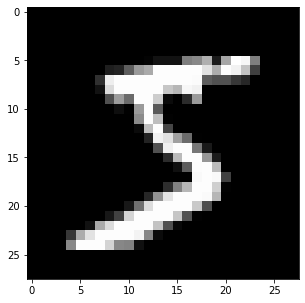

In [5]:
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        ## encoder ##
        # linear layer (784 -> encoding_dim)
        self.fc1 = nn.Linear(28 * 28, encoding_dim)   
        ## decoder ##
        # linear layer (encoding_dim -> input size)
        self.fc2 = nn.Linear(encoding_dim, 28*28)
        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

    
encoding_dim = 32
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
n_epochs = 30

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    for data in train_loader:
        images, _= data
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
        
    train_loss = train_loss/len(train_loader)
    print('epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

C:\Users\reza\anaconda3\envs\t7\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 1 	Training Loss: 0.633195
epoch: 2 	Training Loss: 0.323455
epoch: 3 	Training Loss: 0.280142
epoch: 4 	Training Loss: 0.271142
epoch: 5 	Training Loss: 0.267526
epoch: 6 	Training Loss: 0.265394
epoch: 7 	Training Loss: 0.264026
epoch: 8 	Training Loss: 0.263029
epoch: 9 	Training Loss: 0.262292
epoch: 10 	Training Loss: 0.261663
epoch: 11 	Training Loss: 0.261129
epoch: 12 	Training Loss: 0.260668
epoch: 13 	Training Loss: 0.260258
epoch: 14 	Training Loss: 0.259891
epoch: 15 	Training Loss: 0.259546
epoch: 16 	Training Loss: 0.259221
epoch: 17 	Training Loss: 0.258912
epoch: 18 	Training Loss: 0.258615
epoch: 19 	Training Loss: 0.258334
epoch: 20 	Training Loss: 0.258052
epoch: 21 	Training Loss: 0.257768
epoch: 22 	Training Loss: 0.257518
epoch: 23 	Training Loss: 0.257284
epoch: 24 	Training Loss: 0.257057
epoch: 25 	Training Loss: 0.256831
epoch: 26 	Training Loss: 0.256619
epoch: 27 	Training Loss: 0.256414
epoch: 28 	Training Loss: 0.256210
epoch: 29 	Training Loss: 0.2

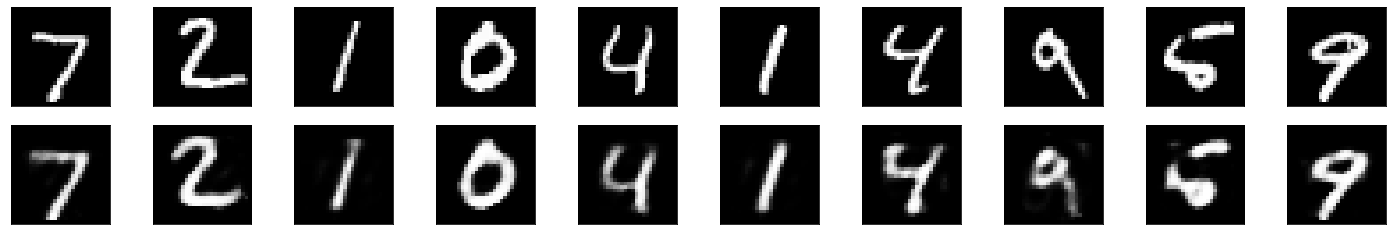

In [9]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0),-1)
output = model(images_flatten)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for images, row in zip([images, output], axes):
    for img,ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)